In [1]:
import pandas as pd
import numpy as np

**«Стримчик»** - интернет-магазине , который продаёт по всему миру компьютерные игры.

**Цель исследования:**

Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. Представленные данные собраны вплоть до 2016 года, нужно отработать принцип работы с данными. Неважно, строится ли прогноз о продажах на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

**План исследования:**
1. [Изучение общей информации по предоставленным данным](#section1)
2. [Подготовка данных](#section2)
3. [Исследовательский анализ данных](#section3)
4. [Портрет пользователя каждого региона](#section4)
5. [Проверка гипотез](#section5)

<a id = 'section1'></a>
## Изучение общей информации по предоставленным данным

Описание данных:

- `Name` — название игры
- `Platform` — платформа
- `Year_of_Release` — год выпуска
- `Genre` — жанр игры
- `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
- `EU_sales` — продажи в Европе (миллионы проданных копий)
- `JP_sales` — продажи в Японии (миллионы проданных копий)
- `Other_sales` — продажи в других странах (миллионы проданных копий)
- `Critic_Score` — оценка критиков (максимум 100)
- `User_Score` — оценка пользователей (максимум 10)
- `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


In [2]:
df = pd.read_csv('/datasets/games.csv')

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Выявим пропущенные значения

In [4]:
df.isna().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

Посмотрим тип данных

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Посмотрим категории рейтинга *ESRB* и дадим им описание 

In [6]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [7]:
ersb_description = pd.DataFrame({'rating':['E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
              'full_rating': ['everyone', 'mature', 'teen', 'everyone10+', 'kids to adults',
                             'adult only', 'early childhood', 'rating pending'],
              'description':['от 6 и старше', 'от 17 и старше', 'от 13 и старше',
                             'от 10 и старше', 'от 6 и старше (до 1996 года)',
                             'от 18 и старше','от 3 и старше', 'ожидает рейтиг']})

In [8]:
ersb_description

,rating,full_rating,description
0,E,everyone,от 6 и старше
1,M,mature,от 17 и старше
2,T,teen,от 13 и старше
3,E10+,everyone10+,от 10 и старше
4,K-A,kids to adults,от 6 и старше (до 1996 года)
5,AO,adult only,от 18 и старше
6,EC,early childhood,от 3 и старше
7,RP,rating pending,ожидает рейтиг


Проверим `User_Score` так как имеет тип данных object

In [9]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Посмотрим портировались ли игры на другие платформы или это всего лишь дубликаты

In [10]:
df.duplicated().sum()

0

In [11]:
df1 = df['Name'].value_counts()
df1 = df1[df1.values > 1]
df1

Need for Speed: Most Wanted           12
Ratatouille                            9
LEGO Marvel Super Heroes               9
FIFA 14                                9
Madden NFL 07                          9
                                      ..
NBA Ballers                            2
Neon Genesis Evangelion                2
Atari Flashback Classics: Volume 2     2
Summon Night 3                         2
Worms Armageddon                       2
Name: Name, Length: 2805, dtype: int64

In [12]:
ported_games = df[df['Name'].isin(df1.index)].sort_values('Name').reset_index(drop = True)

In [13]:
ported_games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Frozen: Olaf's Quest,DS,2013.0,Platform,0.21,0.26,0.00,0.04,NaN,NaN,NaN
1,Frozen: Olaf's Quest,3DS,2013.0,Platform,0.27,0.27,0.00,0.05,NaN,NaN,NaN
2,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
3,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
4,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
5,007: Quantum of Solace,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
6,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
7,007: Quantum of Solace,PS2,2008.0,Action,0.17,0.00,0.00,0.26,NaN,NaN,NaN
8,007: The World is not Enough,PS,2000.0,Action,0.51,0.35,0.00,0.06,61.0,6.7,T
9,007: The World is not Enough,N64,2000.0,Action,1.13,0.38,0.02,0.03,NaN,NaN,NaN


In [14]:
ported_games[['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
              'JP_sales', 'Other_sales']].duplicated().sum()

0

In [15]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [16]:
ported_games.columns = ported_games.columns.str.lower()

### Вывод шаг 1

Первое впечатление от данных

**Пропущенные данные:**
- `Name`, `Genre` доля пропусков менее 1% (всего 2 значения). более того значения связаны - так как нет названия, то не возможно и определить жанр. Смело можно удалять строчки, данное решение не исказит данные.
- `Year_of_Release` - 1,6 % пропусков (269 значений), `Rating` - 40,5% пропусков (6766 значений). Так как игры партируются на разные платформы, то рейтинг ERSB врядли изменится, часть пропущенных значений можно заменить значениями рейтинга на других платформах. Остальные значения корректней было бы заменить нейтральными значениями, либо добавить парсингом данных со стороннего ресурса.
- `Critic_Score` - 51,3% пропусков (8576 значений), `User_Score` - 40,1% пропусков (6701 значений). В данном случае возможно воспользоваться средним или медианной (нужно смотреть распределение).

**Типы данных, которые вызывают сомнения:**
- `Year_of_Release` - следует преобразовать в Int, врядли года бывают нецелочисленными
- `Critic_Score` - просмотрены все уникальные значения и они все целочисленные, логично также было бы превести значения в тип Int
- `User_Score` - тип данных object, что странно для чисел. Были просмотрены уникальные значения, среди чисел обнаружено значение **tbd** (2424 значения). Аббревиатура расшифровывается как to be determined, что означает - рейтинг пока не утвержден.

**Повторяющиеся строчки в данных отсутствуют, повторения в названии обусловлено лишь тем, что игры были портированы на другие игровые платформы.**

**Возможные причины появления пропусков:**
- У некоторых игр низкий попрог вхождения, поэтому не пользуются массовостью, поэтому нет рейтига
- Некоторые игры появились раньше создания рейтинга ESRB
- "Мода на рейтинг" появилась позже, чем дата создания игры
- Не обновлена база по рейтингам

<a id = 'section2'></a>
## Подготовка данных

Преобразуем в нижний регистр

In [17]:
df.columns = df.columns.str.lower()

In [18]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


Убираем пропущенные значения в `Name` и `Genre` 

In [19]:
df = df.dropna(subset = ['name'])

In [20]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.016095
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.400826
rating             0.404715
dtype: float64

Для того чтобы можно было корректно группировать данные по `Year_of_Release` заменим nan на 9999 по default - что будет означать пропущенные значения.

In [21]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [22]:
import warnings

warnings.filterwarnings('ignore')

In [23]:
df['year_of_release'] = df['year_of_release'].fillna(-9999)

In [24]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.400826
rating             0.404715
dtype: float64

Разберемся теперь с `Rating`, для начала создам словарь с данными по играм, которые партируются на другие платформы, где ключем будет названия игры, а значением уже установленный рейтинг ESRB. 

In [25]:
filtered_ported_games = ported_games[ported_games['rating'].notna()]
filtered_ported_games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2,007: Quantum of Solace,PC,2008.0,Action,0.01,0.01,0.00,0.00,70.0,6.3,T
3,007: Quantum of Solace,DS,2008.0,Action,0.11,0.01,0.00,0.01,65.0,tbd,T
4,007: Quantum of Solace,Wii,2008.0,Action,0.29,0.28,0.01,0.07,54.0,7.5,T
5,007: Quantum of Solace,X360,2008.0,Action,0.82,0.51,0.01,0.14,65.0,7.1,T
6,007: Quantum of Solace,PS3,2008.0,Action,0.43,0.51,0.02,0.19,65.0,6.6,T
...,...,...,...,...,...,...,...,...,...,...,...
7953,pro evolution soccer 2011,PS2,2010.0,Sports,0.04,0.21,0.05,0.11,NaN,6.7,E
7954,pro evolution soccer 2011,PSP,2010.0,Sports,0.05,0.30,0.29,0.16,74.0,5.8,E
7955,pro evolution soccer 2011,Wii,2010.0,Sports,0.07,0.10,0.03,0.02,78.0,5.4,E
7957,uDraw Studio: Instant Artist,X360,2011.0,Misc,0.01,0.01,0.00,0.00,54.0,5.7,E


In [26]:
filtered_ported_games = filtered_ported_games[['name', 'rating']]

In [27]:
filtered_ported_games = filtered_ported_games.set_index('name')

In [28]:
group_ESRB = dict([(i, j) for i, j in zip(filtered_ported_games.index, filtered_ported_games['rating'])])

In [29]:
group_ESRB

{'007: Quantum of Solace': 'T',
 '007: The World is not Enough': 'T',
 '18 Wheeler: American Pro Trucker': 'E',
 '187: Ride or Die': 'M',
 '2002 FIFA World Cup': 'E',
 '2010 FIFA World Cup South Africa': 'E',
 '2014 FIFA World Cup Brazil': 'E',
 '25 to Life': 'M',
 '4x4 EVO 2': 'E',
 '50 Cent: Blood on the Sand': 'M',
 '50 Cent: Bulletproof': 'M',
 '50 Classic Games': 'E',
 '7 Days to Die': 'M',
 '7 Wonders of the Ancient World': 'E',
 'AC/DC LIVE: Rock Band Track Pack': 'T',
 'ATV Quad Kings': 'E',
 'ATV Quad Power Racing 2': 'E',
 'ATV: Quad Power Racing': 'E',
 'Ace Combat: Assault Horizon': 'T',
 'Activision Anthology': 'E',
 'Adventure Time: The Secret of the Nameless Kingdom': 'E10+',
 'Aegis of Earth: Protonovus Assault': 'T',
 'Aeon Flux': 'T',
 'Afro Samurai': 'M',
 "Agatha Christie's The ABC Murders": 'T',
 'Agatha Christie: The ABC Murders': 'T',
 'Aggressive Inline': 'T',
 'Air Conflicts: Secret Wars': 'T',
 'AirForce Delta Storm': 'E',
 'Alan Wake': 'T',
 'Alias': 'T',
 'A

После нескольких часов мучений у меня получился словарь. Напишем функцию которая бы заменяла пустые значения рейтинга игры ESRB рейтингом с другой платформы, немного уменьшим пропущенные значения.

In [30]:
def ported_ESRB(row):
    if row['rating'] is np.nan:
        return group_ESRB.get(row['name'])
    return row['rating']

In [31]:
df.query('name == "007: The World is not Enough"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1204,007: The World is not Enough,N64,2000.0,Action,1.13,0.38,0.02,0.03,NaN,NaN,NaN
2243,007: The World is not Enough,PS,2000.0,Action,0.51,0.35,0.00,0.06,61.0,6.7,T


In [32]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.400826
rating             0.404715
dtype: float64

In [33]:
df['rating'] = df.apply(ported_ESRB, axis = 1)

In [34]:
df.query('name == "007: The World is not Enough"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1204,007: The World is not Enough,N64,2000.0,Action,1.13,0.38,0.02,0.03,NaN,NaN,T
2243,007: The World is not Enough,PS,2000.0,Action,0.51,0.35,0.00,0.06,61.0,6.7,T


In [35]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.400826
rating             0.378568
dtype: float64

В итоге несколько часов кодинга, чтобы уменьшить пропуски в `Rating` на 3 %. Остальные пропущенные значения предлагаю заменить нейтральным занчением NR (no rating), так как все таки это категориальная переменная и абы чем не заполнишь, а заполнение модой некорректно, так как сильно может исказить данные. Можно было бы конечно собрать данные парсером с сайта ESRB, но я не разобрался как задать запрос, чтобы по названию игры искала рейтинг, причем рейтинг на сайте указа ввиде картинки. 

In [36]:
df['rating'] = df['rating'].fillna('NR')

In [37]:
df.isna().mean()

name               0.000000
platform           0.000000
year_of_release    0.000000
genre              0.000000
na_sales           0.000000
eu_sales           0.000000
jp_sales           0.000000
other_sales        0.000000
critic_score       0.513133
user_score         0.400826
rating             0.000000
dtype: float64

Разберемся с `user_score` со значением tbd. Выяснили ранее параметр означает, что рейтинг не утвержден, фактически рейтинг отсутствует. Для удобства заполню значения NaN

In [38]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

Теперь возможно поменять формат на float для `user_score`

In [39]:
df['user_score'] = df['user_score'].astype('float')

In [40]:
df['user_score'].unique()

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [41]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NR
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NR


In [42]:
df.groupby(['genre'])[['critic_score', 'user_score']].agg(['mean', 'median'])

critic_score        user_score       
                     mean median       mean median
genre                                             
Action          66.629101   68.0   7.054044    7.4
Adventure       65.331269   66.0   7.133000    7.6
Fighting        69.217604   72.0   7.302506    7.6
Misc            66.619503   69.0   6.819362    7.1
Platform        68.058350   69.0   7.301402    7.7
Puzzle          67.424107   70.0   7.175000    7.5
Racing          67.963612   69.0   7.036193    7.4
Role-Playing    72.652646   74.0   7.619515    7.8
Shooter         70.181144   73.0   7.041883    7.4
Simulation      68.619318   70.0   7.134593    7.5
Sports          71.968174   75.0   6.961197    7.4
Strategy        72.086093   73.0   7.295177    7.8

Изначальное предположение о том, что значения пропущенного рейтинга можно поменять на средние зачения может быть не совсем корректным. Все таки рейтинг больше категориальная переменная, слишком много параметров влияет на него, пропущенных значений порядка 50 %. Средние значения по жанрам показывают слишком хорошие значения. Для того чтобы корректно провести анализ заменим пропущенные значения на -1, чтобы во-первых однозначно их идентифицировать и во-вторых чтобы не путать с реально нулевыми значениями, которые встречаются в данных.

In [43]:
df[['critic_score', 'user_score']] = df[['critic_score', 'user_score']].fillna(-1)

In [44]:
df.isna().mean()

name               0.0
platform           0.0
year_of_release    0.0
genre              0.0
na_sales           0.0
eu_sales           0.0
jp_sales           0.0
other_sales        0.0
critic_score       0.0
user_score         0.0
rating             0.0
dtype: float64

In [45]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,NR
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,NR


Разберемся с типами данных `Year_of_Release`,  `Critic_Score` переведем в INT

In [46]:
df[['year_of_release', 'critic_score']] = df[['year_of_release', 'critic_score']].astype('int')

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16713 non-null int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       16713 non-null int64
user_score         16713 non-null float64
rating             16713 non-null object
dtypes: float64(5), int64(2), object(4)
memory usage: 2.2+ MB


Суммарные продажи во всех регионах

In [48]:
df['all_sales'] = df['na_sales'] +  df['eu_sales'] +  df['jp_sales'] +  df['other_sales']

In [49]:
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1,-1.0,NR,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1,-1.0,NR,31.38


### Вывод шаг 2
После всех преобразаваний имеем датасет без пропущенных данных с корректными типами данными

Нужно помнить:
1. -1 - значения пропущенного рейтинга
2. 9999 - значение пропущенного года
3. NR - отсутствующий рейтинг ESRB

<a id = 'section3'></a>
## Исследовательский анализ данных

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

Посмотрим, сколько игр выпускалось в разные годы.

In [52]:
year_counts = df.groupby('year_of_release')['name'].count().reset_index()
year_counts.columns = ['year_of_release', 'count']
year_counts.head()

,year_of_release,count
0,-9999,269
1,1980,9
2,1981,46
3,1982,36
4,1983,17


<Figure size 1440x720 with 0 Axes>

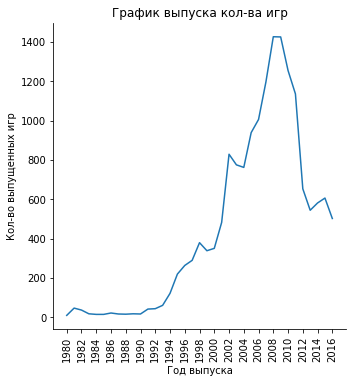

In [53]:
plt.figure(figsize = (20,10))
sns.relplot(data=year_counts[year_counts['year_of_release'] != -9999], x="year_of_release", y="count", kind="line")
plt.xticks(np.arange(1980, 2017, 2))
plt.xticks(rotation=90)
plt.ylabel('Кол-во выпущенных игр')
plt.xlabel('Год выпуска')
plt.title('График выпуска кол-ва игр')
plt.show()

Видно, что игровая индустрия зародилась в 80-е,  появлись первые наработки простеньких игрушек, на рынок выходили единицы. Согласно статье в википедии толчком к развитию послужило в 90-ых годах появление первых аркадных автоматов, настолько стало мейнстримом, что все больше инвесторов стало вкладываться в геймдизайн (рост числа игр на графике).  Сложно сказать, что стало прчиной спада в 2010-2012 года, то ли перенасыщение рынка, то ли отсутсвия свежих идей чтобы удивить наевшуюся публику или же появления первых смарфонов (новая непаханная ниша). Сегодня на рынке остались лишь крупные организации, игры которых ожидают милионы пользователей, хотя следуют заметить, что иногда выстреливают и мелкие коллективы с атмосферным продуктом.

- весь период, что представлен на графике не логично брать, на мой взгляд закономерности успешности игры стоит искать в период  с 1994 по 2016 года - как раз период роста игрового направления и перенасыщение рынка. Необходимо посмотреть какие игры выжили и что является источником спроса на них.

Посмотрим, как менялись продажи по платформам. Выберем 10 платформ с наибольшими суммарными продажами и построим распределение по годам.

Найдем топ 10 платформ по продажам за период:

In [54]:
top10_platform = df.groupby('platform')['all_sales'].sum().sort_values(ascending = False).head(10)
top10_platform

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
Name: all_sales, dtype: float64

Построим распределение по годам

In [55]:
df_top10 = df_top10_sales = df[df['platform'].isin(top10_platform.index)]
df_top10 = df_top10.query('year_of_release != -9999')
df_top10

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76,8.0,E,82.54
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80,8.0,E,32.77
6,New Super Mario Bros.,DS,2006,Platform,11.28,9.14,6.50,2.88,89,8.5,E,29.80
7,Wii Play,Wii,2006,Misc,13.96,9.18,2.93,2.84,58,6.6,E,28.91
...,...,...,...,...,...,...,...,...,...,...,...,...
16708,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,0.01,0.00,0.00,0.00,-1,-1.0,NR,0.01
16709,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,0.00,0.00,0.00,0.00,-1,-1.0,NR,0.00
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,NR,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,-1,-1.0,NR,0.01


Сводная таблица распределения по годам среди 10 платформ с наибольшими суммарными продажами

In [56]:
pivot_df_top10 = df_top10.groupby(['year_of_release', 'platform'])['all_sales'].agg('sum').unstack()
pivot_df_top10

platform,DS,GBA,PC,PS,PS2,PS3,PS4,PSP,Wii,X360
year_of_release,,,,,,,,,,
1985,0.02,NaN,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1988,NaN,NaN,0.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1992,NaN,NaN,3.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1994,NaN,NaN,12.87,6.03,NaN,NaN,NaN,NaN,NaN,NaN
1995,NaN,NaN,4.22,35.96,NaN,NaN,NaN,NaN,NaN,NaN
1996,NaN,NaN,10.58,94.70,NaN,NaN,NaN,NaN,NaN,NaN
1997,NaN,NaN,11.27,136.17,NaN,NaN,NaN,NaN,NaN,NaN
1998,NaN,NaN,3.26,169.49,NaN,NaN,NaN,NaN,NaN,NaN
1999,NaN,NaN,4.74,144.53,NaN,NaN,NaN,NaN,NaN,NaN


Text(0.5, 1.0, 'Распределение по годам среди платформ с наибольшими суммарными продажами')

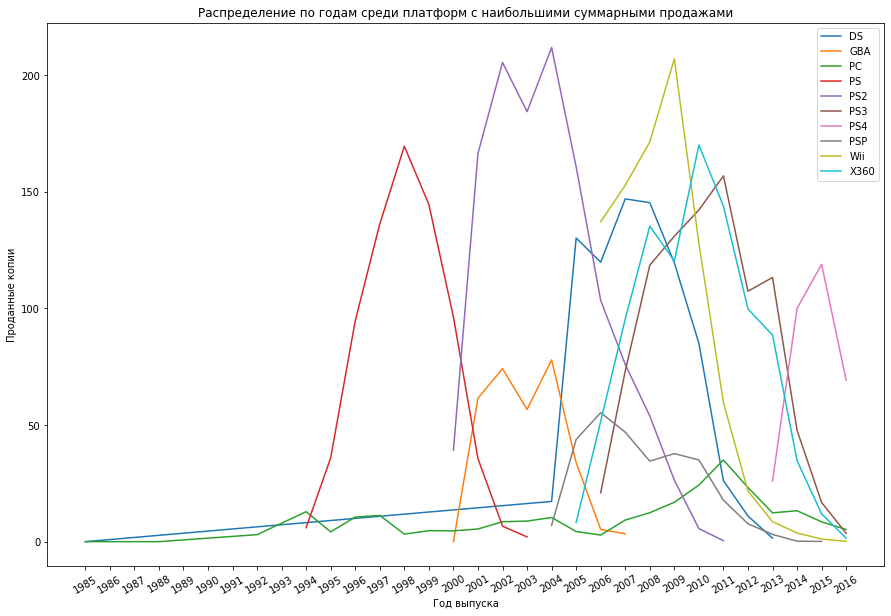

In [57]:
plt.figure(figsize=(15,10))
sns.lineplot(data=pivot_df_top10, dashes = False)
plt.xticks(np.arange(1985, 2017, 1))
plt.xticks(rotation=30)
plt.ylabel('Проданные копии')
plt.xlabel('Год выпуска')
plt.title('Распределение по годам среди платформ с наибольшими суммарными продажами')

Исходя из графика можно проследить характерный срок появляения новых и исчезновения старых платформ. В среднем всегда есть 2-3 платформы которые конкурируют между собой в определенный период времени. В начале 90ых это были PC и PS, затем PS2 и GBA, DS и PSP, вечное противостояние PS3 и X360. Средний срок жизни одной игровой платформы исходя из графика примерно 10 лет. Если смотреть на рынок в целом, то примерно каждый четвертый год появляется новая консоль, компания SONY вообще выпускает свои приставки раз в 6 лет. Что еще интересно, так PC существовал во все времена игровой индустрии и вряд ли куда-либо денется, с учетом сколько стоят игры на консоли.

Определим *актуальный период* на основании которого будем строить прогноз на 2017 год.
Будем оперировать следующей информацией:
- Если срок жизни одной платформы в среднем 10 лет, то прогнозируя продажи на 2017 год корректней взять период в 9 лет, то есть с 2007 года по 2016
- Microsoft и Sony в среднем обновляют свои консоли раз в 6 лет, а так как это основные мастодонты игровой индустрии, то существенная доля игр выпускается на данных платформах, было бы ошибкой не учитывать данный факт, при прогнозировании продаж на 2017 год

Учитывая все вышесказанное, то я бы взял за актульный период следующие года 2010-2016 гг.

Отфильтровали актуальный период

In [58]:
relevant_df = df.query('year_of_release > 2009').reset_index(drop = True)
relevant_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,-1,-1.0,NR,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73


Определяем топ 10 консолей по продажам

In [59]:
relevant_top10_platform = relevant_df.groupby('platform')['all_sales'].agg('sum').sort_values(ascending = False).head(10)
relevant_top10_platform

platform
PS3     587.74
X360    550.41
PS4     314.14
3DS     257.81
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
Name: all_sales, dtype: float64

In [60]:
relevant_df_top10 = relevant_df[relevant_df['platform'].isin(relevant_top10_platform.index)]

Построим сводную таблицу по топ 10 консолям в разрезе продаж, затем посмотрим распределение по годам на графике

In [61]:
pivot_relevant_df_top10 = relevant_df_top10.groupby(['year_of_release', 'platform'])['all_sales'].agg('sum').unstack()
pivot_relevant_df_top10

platform,3DS,DS,PC,PS3,PS4,PSP,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2010,NaN,85.02,24.28,142.17,NaN,35.04,127.95,NaN,170.03,NaN
2011,63.20,26.18,35.03,156.78,NaN,17.82,59.65,NaN,143.84,NaN
2012,51.36,11.01,23.22,107.36,NaN,7.69,21.71,17.56,99.74,NaN
2013,56.57,1.54,12.38,113.25,25.99,3.14,8.59,21.65,88.58,18.96
2014,43.76,NaN,13.28,47.76,100.00,0.24,3.75,22.03,34.74,54.07
2015,27.78,NaN,8.52,16.82,118.90,0.12,1.14,16.35,11.96,60.14
2016,15.14,NaN,5.25,3.60,69.25,NaN,0.18,4.60,1.52,26.15


Text(0.5, 1.0, 'Распределение по годам среди платформ с наибольшими суммарными продажами')

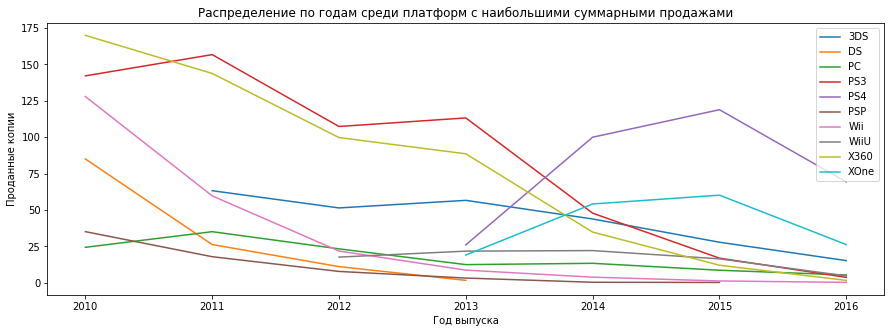

In [144]:
plt.figure(figsize=(15,5))
sns.lineplot(data=pivot_relevant_df_top10, dashes = False)
plt.xticks(np.arange(2010, 2017, 1))
plt.ylabel('Проданные копии')
plt.xlabel('Год выпуска')
plt.title('Распределение по годам среди платформ с наибольшими суммарными продажами')

Если мы смотрим актуальный период, то лидерами по продажам стали PS3 и X360, но следует отметить, что в 2013 консоли обновили свои линейки и продажи игр на старые модели стали падать.  Если выбирать несколько потенциально прибыльных платформ для 2017 года, то я бы выбрал PS4 и XONE так как консоли свежие( им 3 года) и они еще не насытили рынок. Еще в качестве третей платформы выбрал бы PC так как стабильно показывает продажи, хоть и сами по себе низкие.

Посмотрим распределение продаж по всем платформам и по потенциально прибыльным для 2017 года

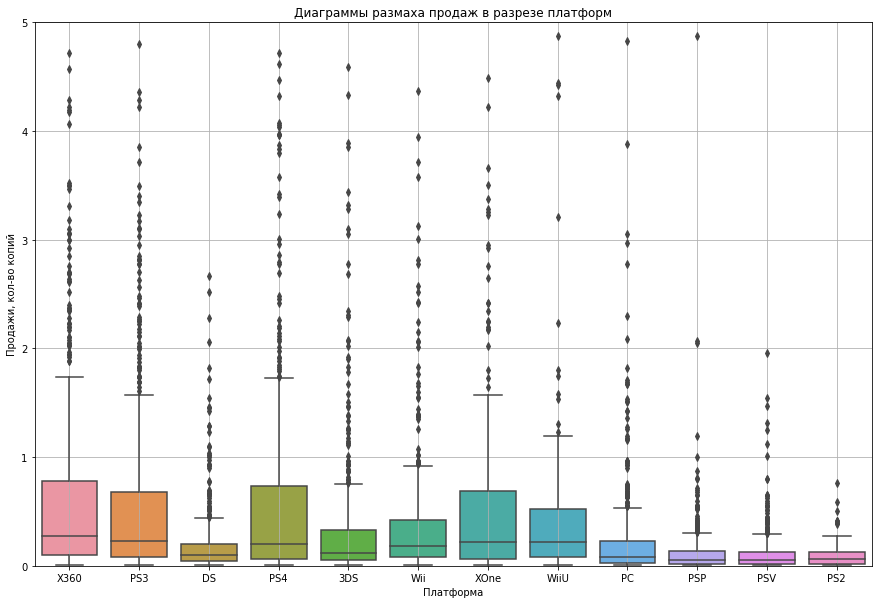

In [63]:
plt.figure(figsize=(15,10))
plt.ylim(0, 5)
sns.boxplot(x='platform', y='all_sales', data = relevant_df)
plt.grid()
plt.title('Диаграммы размаха продаж в разрезе платформ')
plt.xlabel('Платформа')
plt.ylabel('Продажи, кол-во копий')
plt.show()

In [64]:
potentional_platform = relevant_df[relevant_df['platform'].isin(['PS4', 'XOne', 'PC'])]

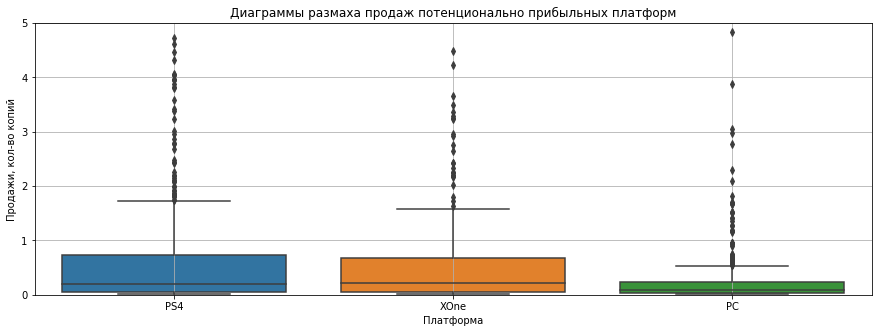

In [65]:
plt.figure(figsize=(15,5))
plt.ylim(0, 5)
sns.boxplot(x='platform', y='all_sales', data = potentional_platform)
plt.grid()
plt.title('Диаграммы размаха продаж потенционально прибыльных платформ')
plt.xlabel('Платформа')
plt.ylabel('Продажи, кол-во копий')
plt.show()

Выявлены следующие наблюдения:
- Медиана PS4 и XOne почти идентичны. В целом по распределению можно сказать, что у PS4 пользователей столько же, сколько и у XOne, игры покупаются однаково часто
- Все распределения смещены немного вправо. Могу объяснить это лишь выходом каких-то эксклюзивов, что заставляло пользователей покупать копий больше чем обычно на определенных платформах.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Возьмем PS3, X360 и PS4 так как за актуальный период по данным платформам самые большие продажи игр

Отфильтруем данные для того что бы не исказить значения корреляции, уберем значения неизвестсных рейтингов.

In [66]:
relevant_df_PS3 = relevant_df.query('platform == "PS3" and critic_score != -1 and user_score != -1')
relevant_df_PS3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
8,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83,5.3,M,13.79
10,Call of Duty: Modern Warfare 3,PS3,2011,Shooter,5.54,5.73,0.49,1.57,88,3.2,M,13.33
12,Call of Duty: Black Ops,PS3,2010,Shooter,5.99,4.37,0.48,1.79,88,6.4,M,12.63
16,Gran Turismo 5,PS3,2010,Racing,2.96,4.82,0.81,2.11,84,7.5,E,10.70


Text(0, 0.5, 'Продажи, кол-во копий')

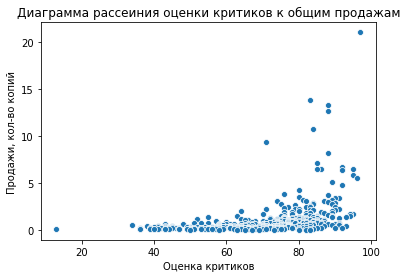

In [67]:
sns.scatterplot(x = 'critic_score', y = 'all_sales', data = relevant_df_PS3)
plt.title('Диаграмма рассеиния оценки критиков к общим продажам')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, кол-во копий')


Text(0, 0.5, 'Продажи, кол-во копий')

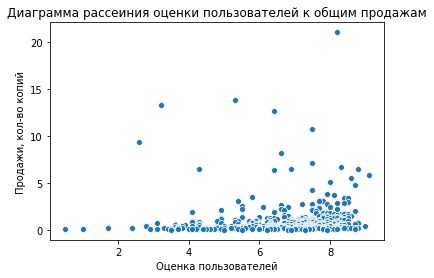

In [68]:
sns.scatterplot(x = 'user_score', y = 'all_sales', data = relevant_df_PS3)
plt.title('Диаграмма рассеиния оценки пользователей к общим продажам')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, кол-во копий')

In [69]:
relevant_df_PS3['critic_score'].corr(relevant_df_PS3['all_sales'])

0.3936035470871838

In [70]:
relevant_df_PS3['user_score'].corr(relevant_df_PS3['all_sales'])

0.08273559916957503

In [71]:
relevant_df_PS3.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.087185,-0.030775,0.050297,-0.029727,0.030783,-0.031605,-0.048836
na_sales,-0.087185,1.000000,0.840745,0.374782,0.864946,0.413521,0.080285,0.938716
eu_sales,-0.030775,0.840745,1.000000,0.439605,0.985467,0.351676,0.054250,0.970995
jp_sales,0.050297,0.374782,0.439605,1.000000,0.439305,0.190311,0.172819,0.494932
other_sales,-0.029727,0.864946,0.985467,0.439305,1.000000,0.362546,0.078995,0.976690
critic_score,0.030783,0.413521,0.351676,0.190311,0.362546,1.000000,0.595259,0.393604
user_score,-0.031605,0.080285,0.054250,0.172819,0.078995,0.595259,1.000000,0.082736
all_sales,-0.048836,0.938716,0.970995,0.494932,0.976690,0.393604,0.082736,1.000000


**PS3**

Проссматривая графики можно сказать, что корреляция между рейтингами и кол-вом проданных копий определенно есть, причем оценки критиков (коэффицент корреляции 0,39) сильнее влияют на продажи, нежели оценки пользователей (коэффицент корреляции 0,08). Корреляция не сильная, но здравый смысл говорит, что она должна быть, возможно зависимость не настолько линейна. Более того следует отметить, что на рейтинг пользователей в большей степени влияет рейтинг критиков (коэффицент корреляции 0,59)

In [72]:
relevant_df_X360 = relevant_df.query('platform == "X360" and critic_score != -1 and user_score != -1')
relevant_df_X360.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
6,Call of Duty: Black Ops,X360,2010,Shooter,9.70,3.68,0.11,1.13,87,6.3,M,14.62
9,Call of Duty: Black Ops II,X360,2012,Shooter,8.25,4.24,0.07,1.12,83,4.8,M,13.68


Text(0, 0.5, 'Продажи, кол-во копий')

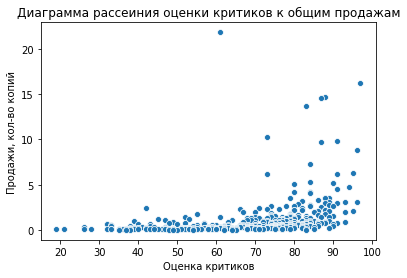

In [73]:
sns.scatterplot(x = 'critic_score', y = 'all_sales', data = relevant_df_X360)
plt.title('Диаграмма рассеиния оценки критиков к общим продажам')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, кол-во копий')

Text(0, 0.5, 'Продажи, кол-во копий')

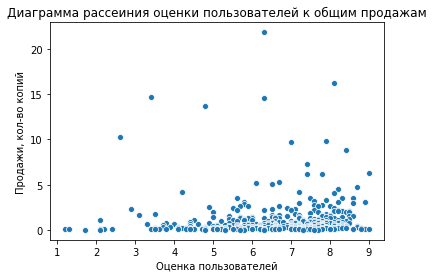

In [74]:
sns.scatterplot(x = 'user_score', y = 'all_sales', data = relevant_df_X360)
plt.title('Диаграмма рассеиния оценки пользователей к общим продажам')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, кол-во копий')

In [75]:
relevant_df_X360['critic_score'].corr(relevant_df_X360['all_sales'])

0.33628027358399615

In [76]:
relevant_df_X360['user_score'].corr(relevant_df_X360['all_sales'])

0.05507910208601403

In [77]:
relevant_df_X360.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.056658,-0.018051,-0.100680,-0.042305,0.066388,-0.096037,-0.046317
na_sales,-0.056658,1.000000,0.870960,0.745698,0.965616,0.313125,0.045898,0.986298
eu_sales,-0.018051,0.870960,1.000000,0.702521,0.963095,0.352740,0.066115,0.939952
jp_sales,-0.100680,0.745698,0.702521,1.000000,0.752075,0.277721,0.119251,0.757925
other_sales,-0.042305,0.965616,0.963095,0.752075,1.000000,0.347144,0.060785,0.993849
critic_score,0.066388,0.313125,0.352740,0.277721,0.347144,1.000000,0.597552,0.336280
user_score,-0.096037,0.045898,0.066115,0.119251,0.060785,0.597552,1.000000,0.055079
all_sales,-0.046317,0.986298,0.939952,0.757925,0.993849,0.336280,0.055079,1.000000


**X360**

Аналогичная ситуация, что и с PS3. Корреляция между рейтингами и кол-вом проданных копий определенно есть, причем оценки критиков (коэффицент корреляции 0,33) сильнее влияют на продажи, нежели оценки пользователей (коэффицент корреляции 0,05). Корреляция не сильная.

In [78]:
relevant_df_PS4 = relevant_df.query('platform == "PS4" and critic_score != -1 and user_score != -1')
relevant_df_PS4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
13,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97,8.3,M,12.62
27,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82,4.3,E,8.58
32,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83,5.7,M,7.66
33,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85,5.0,E,7.60
39,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87,6.5,M,7.17


Text(0, 0.5, 'Продажи, кол-во копий')

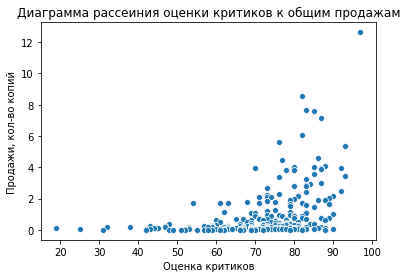

In [79]:
sns.scatterplot(x = 'critic_score', y = 'all_sales', data = relevant_df_PS4)
plt.title('Диаграмма рассеиния оценки критиков к общим продажам')
plt.xlabel('Оценка критиков')
plt.ylabel('Продажи, кол-во копий')

Text(0, 0.5, 'Продажи, кол-во копий')

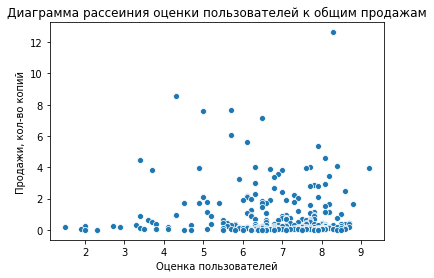

In [80]:
sns.scatterplot(x = 'user_score', y = 'all_sales', data = relevant_df_PS4)
plt.title('Диаграмма рассеиния оценки пользователей к общим продажам')
plt.xlabel('Оценка пользователей')
plt.ylabel('Продажи, кол-во копий')

In [81]:
relevant_df_PS4['critic_score'].corr(relevant_df_PS4['all_sales'])

0.40589480145836687

In [82]:
relevant_df_PS4['user_score'].corr(relevant_df_PS4['all_sales'])

-0.03362497596528878

In [83]:
relevant_df_PS4.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.000000,-0.261760,-0.191355,-0.122830,-0.232177,-0.019983,0.150315,-0.234400
na_sales,-0.261760,1.000000,0.714988,0.530480,0.915292,0.414241,-0.022577,0.893807
eu_sales,-0.191355,0.714988,1.000000,0.519826,0.935136,0.346044,-0.050671,0.951656
jp_sales,-0.122830,0.530480,0.519826,1.000000,0.566734,0.322057,0.174512,0.592214
other_sales,-0.232177,0.915292,0.935136,0.566734,1.000000,0.408465,-0.037332,0.997798
critic_score,-0.019983,0.414241,0.346044,0.322057,0.408465,1.000000,0.557654,0.405895
user_score,0.150315,-0.022577,-0.050671,0.174512,-0.037332,0.557654,1.000000,-0.033625
all_sales,-0.234400,0.893807,0.951656,0.592214,0.997798,0.405895,-0.033625,1.000000


**PS4**

Немного другая ситуация по сравнению с PS3 и X360. Корреляция между рейтингами и кол-вом проданных копий определенно есть, причем оценки критиков (коэффицент корреляции 0,40) сильнее влияют на продажи, нежели оценки пользователей (коэффицент корреляции - 0,03). Корреляция не сильная, причем корреляция между оценками пользователей и продажами имеет обратную связь, можно предположить, что это связано с тем, что PS4 относительно новая платформа и стоимость игр как правило запредельная, чем луше игра с точки зрения пользователя, тем дороже она, тем меньше хочется ее покупать.  

Выводы о корреляции рейтингов с продажами

Корреляция имеется, но она не такая явная, нелинейна. Мои предположения о том с чем это связано:

- **Можно сказать, что на рейтинг пользователей в большей степени оказывает влияние рейтинг критиков.** 
- **Есть доля пользователей, которые приобретают игры на основании высоких рейтингов, но на мой взгляд это не всегда так.** 
- **Бывает такое, что можно позаимствовать игры у друга и сложить о ней какое-то впечатление(рейтинг)**
- **Крупные игровые конторы имеют франшизы определенных игр. Пользователи могут покупать игры на сонове исторического опыта, продолжения сюжета**
- **Так же не стоить забывать и пиратстве, мнение можно сформировать и без покупки копии**

Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых покупаемых жанрах? Выделяются ли жанры с высокими и низкими продажами?

In [84]:
relevant_df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,-1,-1.0,NR,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73
...,...,...,...,...,...,...,...,...,...,...,...,...
5272,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,NR,0.01
5273,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,-1,-1.0,NR,0.01
5274,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,-1,-1.0,NR,0.01
5275,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,-1,-1.0,NR,0.01


In [85]:
pivot_relevant_df_genre = relevant_df.groupby(['genre'])['all_sales'].agg('sum').sort_values(ascending = False)
pivot_relevant_df_genre

genre
Action          673.09
Shooter         479.74
Sports          328.39
Role-Playing    315.28
Misc            234.56
Racing          122.68
Platform        119.72
Fighting         81.59
Simulation       71.75
Adventure        61.00
Strategy         35.84
Puzzle           20.60
Name: all_sales, dtype: float64

На первый взгляд самый покупаемый жанр это Action, а самый невостребованный среди пользователей это Puzzle. Однако следует отметить, что одна игра может включить в себя несколько жанров и ее сложно отнести к какомо-ту одному типу.

### Общий вывод по шагу 3
- Принимаем актуальный период прогноза 2010 - 2016 г.
- В актуальном периоде лидируют по продажам X360 и PS3, так же следует обратить внимание на PS4 и XOne так как в ближайшее время сместят предыдущие аналоги. Ну и продажи на PC где то ползут, зато они всегда есть внезависимости от времени года и часа.
- Не выдялил бы различия в продажах игр отдельно на X360 и PS3, пользователи одинаково играют на обоих платформах и покупают игры к ним, конечно кроме эксклюзивок
- Имеется доля пользователей на покупки видеоигр которых, влияет мнение сообщества и критиков(причем в большей степени). Следует отметить что данная зависимость нелинейна и неявляется основаполагающей.
- Лидирующие жанры среди покупаемых игрушек - это Action и Shooter

<a id = 'section4'></a>
## Портрет пользователя каждого региона

Составим портрет пользователя каждого региона (NA, EU, JP)

In [86]:
relevant_df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating',
       'all_sales'],
      dtype='object')

Выделим регион NA в отдельную таблицу

In [87]:
relevant_df_na = relevant_df[['name', 'platform', 'year_of_release', 'genre', 'na_sales',
                  'other_sales', 'critic_score', 'user_score', 'rating', 'all_sales']]

In [88]:
relevant_df_na.head()

,name,platform,year_of_release,genre,na_sales,other_sales,critic_score,user_score,rating,all_sales
0,Kinect Adventures!,X360,2010,Misc,15.00,1.69,61,6.3,E,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.02,3.96,97,8.2,M,21.05
2,Grand Theft Auto V,X360,2013,Action,9.66,1.41,97,8.1,M,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,0.80,-1,-1.0,NR,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,1.32,88,3.4,M,14.73


Определим топ 5 платформ для региона NA

In [89]:
top5_na_platform = (
    relevant_df_na
    .groupby('platform')[['na_sales', 'all_sales']]
    .agg('sum').sort_values('na_sales', ascending = False).head()
)

In [90]:
top5_na_platform

,na_sales,all_sales
platform,,
X360,334.18,550.41
PS3,229.25,587.74
Wii,121.20,222.97
PS4,108.74,314.14
XOne,93.12,159.32


Добавим столбец ratio_sales для доли продаж региона

In [91]:
top5_na_platform['ratio_sales'] = (top5_na_platform['na_sales'] / top5_na_platform['all_sales'].sum()).round(2)
top5_na_platform

,na_sales,all_sales,ratio_sales
platform,,,
X360,334.18,550.41,0.18
PS3,229.25,587.74,0.12
Wii,121.20,222.97,0.07
PS4,108.74,314.14,0.06
XOne,93.12,159.32,0.05


В регионе NA топ 5 платформ по продоваемости игр - X360, PS3, Wii, PS4, XOne. В Америке больше предпочитают  X360, поддерживают отечественного производителя))))))

In [92]:
top5_na_genre = (
    relevant_df_na
    .groupby('genre')[['na_sales', 'all_sales']]
    .agg('sum').sort_values('na_sales', ascending = False).head()
)

In [93]:
top5_na_genre

,na_sales,all_sales
genre,,
Action,290.64,673.09
Shooter,237.47,479.74
Sports,156.81,328.39
Misc,123.80,234.56
Role-Playing,112.05,315.28


In [94]:
top5_na_genre['ratio_sales'] = (top5_na_genre['na_sales'] / top5_na_genre['all_sales']).round(2)
top5_na_genre

,na_sales,all_sales,ratio_sales
genre,,,
Action,290.64,673.09,0.43
Shooter,237.47,479.74,0.49
Sports,156.81,328.39,0.48
Misc,123.80,234.56,0.53
Role-Playing,112.05,315.28,0.36


In [95]:
top5_na_genre.index

Index(['Action', 'Shooter', 'Sports', 'Misc', 'Role-Playing'], dtype='object', name='genre')

В регионе NA топ 5 жанров по продоваемости игр - Action, Shooter, Sports, Misc, Role-Playing. 

In [96]:
esrb_na = relevant_df_na.groupby('rating')['na_sales'].agg('sum').sort_values(ascending = False).reset_index()

In [97]:
esrb_na

,rating,na_sales
0,M,394.18
1,E,275.44
2,T,167.41
3,E10+,163.06
4,NR,128.68
5,EC,1.64
6,RP,0.00


In [98]:
ersb_description = pd.DataFrame({'rating':['E', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP', 'NR'],
              'full_rating': ['everyone', 'mature', 'teen', 'everyone10+', 'kids to adults',
                             'adult only', 'early childhood', 'rating pending', 'no raring'],
              'description':['от 6 и старше', 'от 17 и старше', 'от 13 и старше',
                             'от 10 и старше', 'от 6 и старше (до 1996 года)',
                             'от 18 и старше','от 3 и старше', 'ожидает рейтиг', 'нет рейтинга']})
ersb_description

,rating,full_rating,description
0,E,everyone,от 6 и старше
1,M,mature,от 17 и старше
2,T,teen,от 13 и старше
3,E10+,everyone10+,от 10 и старше
4,K-A,kids to adults,от 6 и старше (до 1996 года)
5,AO,adult only,от 18 и старше
6,EC,early childhood,от 3 и старше
7,RP,rating pending,ожидает рейтиг
8,NR,no raring,нет рейтинга


In [99]:
esrb_na_update = esrb_na.merge(ersb_description, how='left',on=['rating'])

In [100]:
esrb_na_update

,rating,na_sales,full_rating,description
0,M,394.18,mature,от 17 и старше
1,E,275.44,everyone,от 6 и старше
2,T,167.41,teen,от 13 и старше
3,E10+,163.06,everyone10+,от 10 и старше
4,NR,128.68,no raring,нет рейтинга
5,EC,1.64,early childhood,от 3 и старше
6,RP,0.00,rating pending,ожидает рейтиг


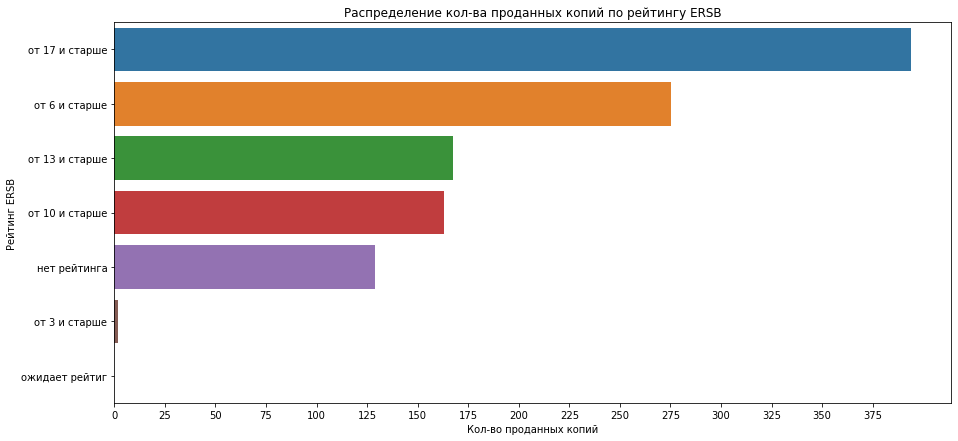

In [101]:
plt.figure(figsize=(15,7))
plt.title('Распределение кол-ва проданных копий по рейтингу ERSB')
sns.barplot(y="description", x ="na_sales", data=esrb_na_update)
plt.ylabel('Рейтинг ERSB')
plt.xlabel('Кол-во проданных копий')
plt.xticks(np.arange(0, 400, 25))
plt.show()

В Америке лидируют продажи игр с возрастной отметкой 17+, затем 6+ и 13+. 

Выделим регион EU в отдельную таблицу

In [102]:
relevant_df_eu = relevant_df[['name', 'platform', 'year_of_release', 'genre', 'eu_sales',
                  'other_sales', 'critic_score', 'user_score', 'rating', 'all_sales']]

In [103]:
relevant_df_eu.head()

,name,platform,year_of_release,genre,eu_sales,other_sales,critic_score,user_score,rating,all_sales
0,Kinect Adventures!,X360,2010,Misc,4.89,1.69,61,6.3,E,21.82
1,Grand Theft Auto V,PS3,2013,Action,9.09,3.96,97,8.2,M,21.05
2,Grand Theft Auto V,X360,2013,Action,5.14,1.41,97,8.1,M,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,3.17,0.80,-1,-1.0,NR,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,4.24,1.32,88,3.4,M,14.73


In [104]:
top5_eu_platform = (
    relevant_df_eu
    .groupby('platform')[['eu_sales', 'all_sales']]
    .agg('sum').sort_values('eu_sales', ascending = False).head()
)

Определим топ 5 платформ для региона EU

In [105]:
top5_eu_platform

,eu_sales,all_sales
platform,,
PS3,213.60,587.74
X360,163.41,550.41
PS4,141.09,314.14
PC,68.82,121.96
Wii,65.91,222.97


Добавим столбец ratio_sales для доли продаж региона

In [106]:
top5_eu_platform['ratio_sales'] = (top5_eu_platform['eu_sales'] / top5_eu_platform['all_sales']).round(2)
top5_eu_platform

,eu_sales,all_sales,ratio_sales
platform,,,
PS3,213.60,587.74,0.36
X360,163.41,550.41,0.30
PS4,141.09,314.14,0.45
PC,68.82,121.96,0.56
Wii,65.91,222.97,0.30


В регионе EU топ 5 платформ по продоваемости игр - PS3, X360, PS4, PC, Wii. В Европе больше предпочитают  PS3, но так же в топ попал и PC.

In [107]:
top5_eu_genre = (
    relevant_df_eu
    .groupby('genre')[['eu_sales', 'all_sales']]
    .agg('sum').sort_values('eu_sales', ascending = False).head()
)

In [108]:
top5_eu_genre

,eu_sales,all_sales
genre,,
Action,233.63,673.09
Shooter,171.45,479.74
Sports,116.84,328.39
Role-Playing,75.48,315.28
Misc,66.09,234.56


В регионе EU ничего нового, все те же топ 5 жанров  - Action, Shooter, Sports,Role-Playing, Misc . 

In [109]:
esrb_eu = relevant_df_eu.groupby('rating')['eu_sales'].agg('sum').sort_values(ascending = False).reset_index()

In [110]:
esrb_eu_update = esrb_eu.merge(ersb_description, how='left',on=['rating'])
esrb_eu_update

,rating,eu_sales,full_rating,description
0,M,304.75,mature,от 17 и старше
1,E,200.38,everyone,от 6 и старше
2,T,118.59,teen,от 13 и старше
3,NR,114.78,no raring,нет рейтинга
4,E10+,102.68,everyone10+,от 10 и старше
5,RP,0.03,rating pending,ожидает рейтиг
6,EC,0.00,early childhood,от 3 и старше


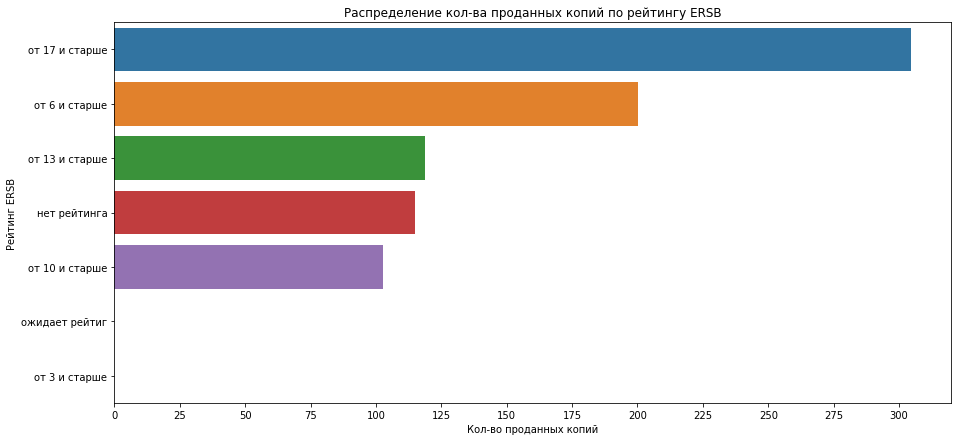

In [111]:
plt.figure(figsize=(15,7))
plt.title('Распределение кол-ва проданных копий по рейтингу ERSB')
sns.barplot(y="description", x ="eu_sales", data=esrb_eu_update)
plt.ylabel('Рейтинг ERSB')
plt.xlabel('Кол-во проданных копий')
plt.xticks(np.arange(0, 320, 25))
plt.show()

В Европе схожа ситуцация с Америкой, так же лидируют продажи игр с возрастной отметкой 17+, затем 6+ и 13+. 

Выделим регион JP в отдельную таблицу

In [112]:
relevant_df_jp= relevant_df[['name', 'platform', 'year_of_release', 'genre', 'jp_sales',
                  'other_sales', 'critic_score', 'user_score', 'rating', 'all_sales']]

In [113]:
relevant_df_jp.head()

,name,platform,year_of_release,genre,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Kinect Adventures!,X360,2010,Misc,0.24,1.69,61,6.3,E,21.82
1,Grand Theft Auto V,PS3,2013,Action,0.98,3.96,97,8.2,M,21.05
2,Grand Theft Auto V,X360,2013,Action,0.06,1.41,97,8.1,M,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.65,0.80,-1,-1.0,NR,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,0.13,1.32,88,3.4,M,14.73


In [114]:
top5_jp_platform = (
    relevant_df_jp
    .groupby('platform')[['jp_sales', 'all_sales']]
    .agg('sum').sort_values('jp_sales', ascending = False).head()
)

Определим топ 5 платформ для региона JP

In [115]:
top5_jp_platform

,jp_sales,all_sales
platform,,
3DS,100.62,257.81
PS3,59.26,587.74
PSP,42.20,64.05
DS,27.90,123.75
PSV,21.84,53.81


Добавим столбец ratio_sales для доли продаж региона

In [116]:
top5_jp_platform['ratio_sales'] = (top5_jp_platform['jp_sales'] / top5_jp_platform['all_sales']).round(2)
top5_jp_platform

,jp_sales,all_sales,ratio_sales
platform,,,
3DS,100.62,257.81,0.39
PS3,59.26,587.74,0.10
PSP,42.20,64.05,0.66
DS,27.90,123.75,0.23
PSV,21.84,53.81,0.41


Воу-воу да Азиаты себе не изменяют. Топ5 платформ это приемущественно портативные приставки (причем в этом регионе сосредоточена основная доля игр данных платформ), не удивительно что в Азии так развит рынок мобильных игр. Топ 5 платформ 3DS, PS3, PSP, DS, PSV. Естественно все консоли отечственного производителя.

In [117]:
top5_jp_genre = (
    relevant_df_jp
    .groupby('genre')[['jp_sales', 'all_sales']]
    .agg('sum').sort_values('jp_sales', ascending = False).head()
)

In [118]:
top5_jp_genre

,jp_sales,all_sales
genre,,
Role-Playing,103.54,315.28
Action,72.20,673.09
Misc,24.29,234.56
Platform,15.81,119.72
Adventure,15.67,61.00


In [119]:
top5_jp_genre.index

Index(['Role-Playing', 'Action', 'Misc', 'Platform', 'Adventure'], dtype='object', name='genre')

Опа и тут неожиданность, азиаты заядлые ролевики. Action естественно также никуда неделся. Интересно, что в топ5 забрался и платформер. 

In [120]:
esrb_jp = relevant_df_jp.groupby('rating')['jp_sales'].agg('sum').sort_values(ascending = False).reset_index()

In [121]:
esrb_jp_update = esrb_jp.merge(ersb_description, how='left',on=['rating'])
esrb_jp_update

,rating,jp_sales,full_rating,description
0,NR,162.75,no raring,нет рейтинга
1,E,48.81,everyone,от 6 и старше
2,T,47.93,teen,от 13 и старше
3,M,32.04,mature,от 17 и старше
4,E10+,13.61,everyone10+,от 10 и старше
5,RP,0.00,rating pending,ожидает рейтиг
6,EC,0.00,early childhood,от 3 и старше


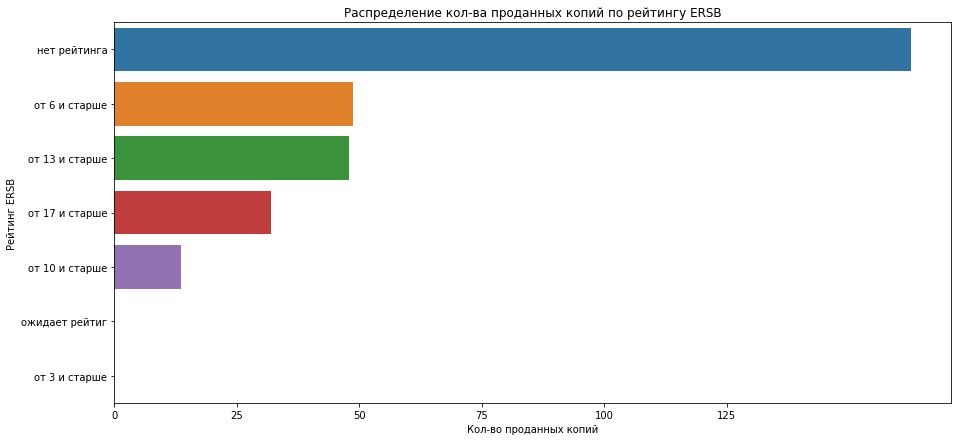

In [122]:
plt.figure(figsize=(15,7))
plt.title('Распределение кол-ва проданных копий по рейтингу ERSB')
sns.barplot(y="description", x ="jp_sales", data=esrb_jp_update)
plt.ylabel('Рейтинг ERSB')
plt.xlabel('Кол-во проданных копий')
plt.xticks(np.arange(0, 150, 25))
plt.show()

Лидируют игры без рейтинга. С чем это может быть связано не понятно, как вариант база не обновилась по Азиатскому рынку или возможно из-за того что актуальные жанры специфичны лишь для Азии, то часть игр просто не выпускаются в других регионах и является нишевыми, поэтому Американский возрастной рейтинг не выставляется, а те игры которые локализуются уже его получают (так как в остальных категориях распределение похоже на европу/америку)

### Вывод по шагу 4

- Типичный американский игрун: **платформы**: X360, PS3, Wii, PS4, XOne; **жанры**: Action, Shooter, Sports, Misc, Role-Playing. Лидируют две категории по возрастному ограничению (**рейтинг ERSB**): 17+ и 6+
- Типичный европейский игрун: **платформы**: PS3, X360, PS4, PC, Wii; **жанры**: Action, Shooter, Sports,Role-Playing, Misc. Лидируют две категории по возрастному ограничению (**рейтинг ERSB**): 17+ и 6+
- Типичный азиатский игрун: **платформы**: 3DS, PS3, PSP, DS, PSV; **жанры**: Role-Playing, Action, Misc, Platform, Adventure. Лидируют одна категория по возрастному ограничению (**рейтинг ERSB**): без рейтинга

Если смотреть в разрезе платформ, то доля от всех продаж X360 в европе 30 %, в америке 18%, в азии не котируется. PS3 в европе 36%, америке 12 %,  в азии 10 %. Продажи игр на портативные приставки полностью отобрала Азия

<a id = 'section5'></a>
## Проверка гипотез

In [123]:
from scipy import stats as st

Проверим гипотизу о том, что cредние пользовательские рейтинги платформ Xbox One и PC одинаковые. 
- нулевая гипотеза Н0:  Средние пользовательские рейтинги платформ Xbox One и PC не различаются
- альтернмтивная гипотеза Н1: Средние пользовательские рейтинги платформ Xbox One и PC различаются

In [124]:
relevant_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61,6.3,E,21.82
1,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97,8.2,M,21.05
2,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97,8.1,M,16.27
3,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,-1,-1.0,NR,15.13
4,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88,3.4,M,14.73


Собирем таблицы по платформам

In [125]:
XOne = relevant_df.query('platform == "XOne" and user_score != -1')

In [126]:
PC = relevant_df.query('platform == "PC" and user_score != -1')

Зададим alpha

In [127]:
alpha = .05

Проверим дисперсии, насколько я понял, то у нас представлена выборка поэтому ddof = 1

In [128]:
np.var(XOne['user_score'], ddof = 1)

1.9069968429360695

In [129]:
np.var(PC['user_score'], ddof = 1)

2.450446015110894

Проверим гипотезу

In [130]:
results = st.ttest_ind(
    XOne['user_score'], 
    PC['user_score'], equal_var=False)

In [131]:
results.pvalue

0.9801634129117883

In [132]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


In [133]:
 XOne['user_score'].mean()

6.521428571428572

In [134]:
 PC['user_score'].mean()

6.5181818181818185

 Средний пользовательский рейтинг XOne и PC не различаются, однако насколько возможно, что это лишь случаность предложенной выборки. Полученное значение p-value говорит о том, что с вероятностью 98% такое или большее можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средним рейтингом пользователей XOne и PC.

Проверим гипотизу о том, что cредние пользовательские рейтинги жанров Action и Sport разные. 
- нулевая гипотеза Н0:  Средние пользовательские рейтинги жанров Action и Sport не различаются
- альтернмтивная гипотеза Н1:  Средние пользовательские рейтинги жанров Action и Sport различаются

Собирем таблицы по жанрам

In [135]:
action = relevant_df.query('genre == "Action" and user_score != -1')

In [136]:
sports = relevant_df.query('genre == "Sports" and user_score != -1')

Проверим дисперсии, насколько я понял, то у нас представлена выборка поэтому ddof = 1

In [137]:
np.var(action['user_score'], ddof = 1)

1.8501475426606517

In [138]:
np.var(sports['user_score'], ddof = 1)

2.8356344151248614

Проверим гипотезу

In [139]:
results = st.ttest_ind(
    action['user_score'], 
    sports['user_score'], equal_var=False)

In [140]:
results.pvalue

1.4516152467844418e-15

In [141]:
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


In [142]:
action['user_score'].mean()

6.781899871630296

In [143]:
sports['user_score'].mean()

5.901587301587302

Cредние пользовательские рейтинги жанров Action и Sport различаются, однако насколько возможно, что это лишь случаность предложенной выборки. Полученное значение p-value говорит о том, что с вероятностью намного меньше 1%(1.4516152467844418e-15) такое или большее различие можно получить случайно. Это явно слишком маленькая вероятность, чтобы делать вывод  о том, что Cредние пользовательские рейтинги жанров Action и Sport не различаются. 

### Вывод по шагу 5

Проверены две гипотезы по данным двух выборок
- Средний пользовательский рейтинг XOne и PC не различаются, но с веротяностью 98% данные средние получены случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними рейтингами.
- Cредние пользовательские рейтинги жанров Action и Sport различаются, но с веротяностью менее 1% данные средние получены случайно. Это явно слишком маленькая вероятность, чтобы делать вывод  о том, что Cредние пользовательские рейтинги жанров Action и Sport не различаются. 